# pytorch 기반 MLP 기초 실습

# 데이터 준비

## 1 데이터 준비하기

### 1) Dataset 클래스

In [ ]:
# 라이브러리 불러오기

from torch.utils.data import Dataset

In [ ]:
a = [1, 2, 3]
a, len(a), a[1]

([1, 2, 3], 3, 2)

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y

In [ ]:
x = [1, 2, 3]
y = [10, 20, 30]
dataset = CustomDataset(x, y) # __init__ 실행

In [ ]:
dataset.x_data, dataset.y_data

([1, 2, 3], [10, 20, 30])

In [ ]:
len(dataset) # __len__ 실행

3

In [ ]:
dataset[1] # __getitem__ 실행

(2, 20)

In [ ]:
dataset[:2] # __getitem__ 실행

([1, 2], [10, 20])

### 문제
위 코드를 따라서, 동일하게 데이터셋 클래스를 선언하고, 클래스를 이용하여 아래 조건에 맞는 데이터셋 객체를 선언해보자.
- x : 1~10 1씩 증가, 10개
- y : 100~1000 , 100씩 증가, 10개  
이어서, len, getitem함수 호출해보자.

In [ ]:
from torch.utils.data import Dataset


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return x, y

In [ ]:
x = [i+1 for i in range(10)]
y = [10*i for i in x]

print("x :", x)
print("y :", y)



x : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [ ]:
dataset = CustomDataset(x, y)

In [ ]:
dataset.x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
dataset.y

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
len(dataset)

10

In [ ]:
dataset[0]

(1, 10)

In [ ]:
dataset[4::]

([5, 6, 7, 8, 9, 10], [50, 60, 70, 80, 90, 100])

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, x, y): # 초기화 변수
        self.x = x
        self.y = y

     # __len__ 메소드는 데이터셋의 총 샘플 수 반환
    def __len__(self):
        return len(self.x)

    # __getitem__ 메소드는 주어진 인덱스에 해당하는 샘플을 가져옴
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        return x, y

In [ ]:
#샘플 데이터 생성
x = [i+1 for i in range(10)]
y = [10*i for i in x]

print("x :", x)
print("y :", y)

x : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [ ]:
dataset = CustomDataset(x, y)

In [ ]:
dataset.x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
dataset.y

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
len(dataset)

10

In [ ]:
dataset[0]

(1, 10)

In [ ]:
dataset[1:3]

([2, 3], [20, 30])

In [ ]:
## __len__ 메서드 실행

    # def __len__(self):
    #     return len(self.x)

print(f"데이터셋의 총 샘플 수 : {len(dataset)}")

## __getitem__ 메서드 실행

    # def __getitem__(self, idx):
    #     x = self.x[idx]
    #     y = self.y[idx]
    #     return x, y

sample_x, sample_y = dataset[2]
print(f"2 번째 x : {sample_x} \n2 번째 y : {sample_y} ")

데이터셋의 총 샘플 수 : 10
2 번째 x : 3 
2 번째 y : 30 


### 2) DataLoader 클래스

In [ ]:
# 클래스 불러오기
from torch.utils.data import DataLoader

In [ ]:
data_loader = DataLoader(dataset=dataset, batch_size=3, shuffle=False)

data_loader

In [ ]:
# DataLoader를 통해 데이터를 배치 단위로 불러오기
for idx, (x, y) in enumerate(data_loader):
    print(f'Batch {idx+1}')
    print('x:', x, ', y:', y)

Batch 1
x: tensor([1, 2, 3]) , y: tensor([10, 20, 30])
Batch 2
x: tensor([4, 5, 6]) , y: tensor([40, 50, 60])
Batch 3
x: tensor([7, 8, 9]) , y: tensor([70, 80, 90])
Batch 4
x: tensor([10]) , y: tensor([100])


### 3)MNIST 데이터 불러오기 예제

In [ ]:
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# MNIST 데이터셋을 불러옵니다. 이때 transforms는 None으로 설정하여 원본 이미지를 그대로 불러옵니다.
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.74MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 3.84MB/s]


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [ ]:
len(mnist)

60000

In [ ]:
mnist[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
image, label = mnist[0]

In [ ]:
np.array(image)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

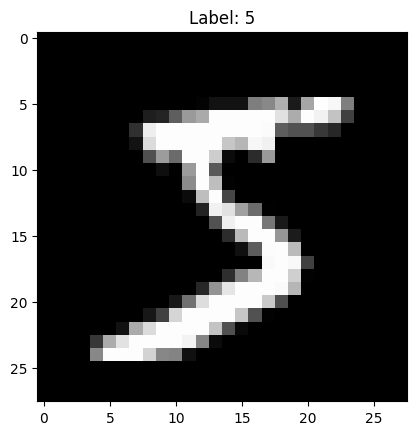

In [ ]:
# 이미지를 출력합니다.
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

Batch 1
Images shape: torch.Size([64, 28, 28]) , Labels shape: torch.Size([64])

배치 중 임의의 이미지 출력 - 레이블 : tensor(0)


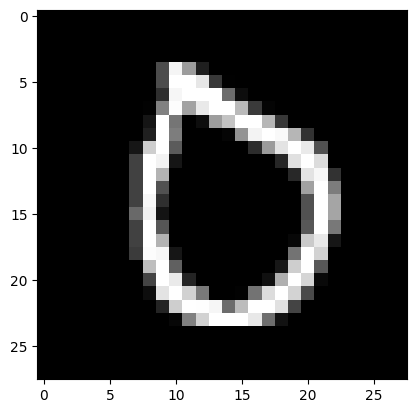

In [ ]:
from torch.utils.data import Dataset, DataLoader

# 커스텀 데이터셋 클래스를 정의합니다.
class CustomDataset(Dataset):
    def __init__(self, mnist):
        self.mnist = mnist

    def __getitem__(self, idx):
        image, label = self.mnist[idx]
        return np.array(image), label  # 이미지를 넘파이 배열로 변환하여 반환합니다.

    def __len__(self):
        return len(self.mnist)

# 커스텀 데이터셋 객체를 생성합니다.
custom_dataset = CustomDataset(mnist)

# DataLoader를 이용해 데이터를 배치 단위로 불러올 수 있도록 합니다.
data_loader = DataLoader(custom_dataset, batch_size=64, shuffle=True)

# DataLoader를 통해 데이터를 불러옵니다.
for idx, (images, labels) in enumerate(data_loader):
    sample_img, sample_lb = images[0], labels[0]
    print(f'Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.



# 배치 중 하나의 이미지를 출력해봅니다.
print("")
print("배치 중 임의의 이미지 출력 - 레이블 :", sample_lb)
plt.imshow(sample_img, cmap='gray')
plt.show()

### 문제
직접 해봅시다.
위의 코드를 그대로 이용하여 다음을 수행하시오.
- mnist 데이터를 customdataset 클래스로 선언하되, image를 array로 변환하여 반환받으시오.
- batch size는 128로 설정하시오.
- 출력해보시오.

Batch 1
Images shape: torch.Size([128, 28, 28]) , Labels shape: torch.Size([128])

배치 중 임의의 이미지 출력 - 레이블 : tensor(7)


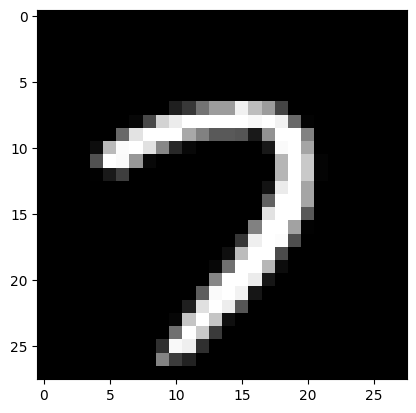

In [ ]:
from torch.utils.data import Dataset, DataLoader

# 커스텀 데이터셋 클래스를 정의합니다.
class CustomDataset(Dataset):
    def __init__(self, mnist):
        self.mnist = mnist

    def __getitem__(self, idx):
        image, label = self.mnist[idx]
        return np.array(image), label  # 이미지를 넘파이 배열로 변환하여 반환합니다.

    def __len__(self):
        return len(self.mnist)

custom_dataset = CustomDataset(mnist)

data_loader = DataLoader (custom_dataset, batch_size=128, shuffle=True)

for idx, (images, labels) in enumerate(data_loader):
    sample_img, sample_lb = images[0], labels[0]
    print(f'Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break

print("")
print("배치 중 임의의 이미지 출력 - 레이블 :", sample_lb)
plt.imshow(sample_img, cmap='gray')
plt.show()

## 2. 전처리

### 1) Transform을 이용하지 않고 직접 전처리

In [ ]:
import nltk
from torch.utils.data import Dataset, DataLoader
import torch
from nltk.tokenize import word_tokenize

# nltk의 'punkt' 토큰화 모듈을 다운
# 이 모듈은 word_tokenize 함수가 영어 텍스트를 토큰화하는 데 필요합니다.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 샘플 텍스트 데이터 생성
texts = ['I love PyTorch!', 'It is very easy to use.']
labels = [1, 0]

In [ ]:
# nltk의 word_tokenize 함수를 사용하여 텍스트를 토큰화
tokenized_texts = [word_tokenize(text) for text in texts]
tokenized_texts

[['I', 'love', 'PyTorch', '!'], ['It', 'is', 'very', 'easy', 'to', 'use', '.']]

In [ ]:
# 단어 사전을 만들어 각 단어에 인덱스를 부여합니다.
# '<PAD>'와 '<UNK>'는 각각 패딩과 알 수 없는 단어를 나타내는 특수 토큰입니다.
vocab = {'<PAD>': 0, '<UNK>': 1, 'I': 2, 'love': 3, 'PyTorch': 4, 'It': 5,
         'is': 6, 'very': 7, 'easy': 8, 'to': 9, 'use': 10}
indexed_tokens = [[vocab.get(token, vocab['<UNK>']) for token in tokens] for tokens in tokenized_texts]


vocab, indexed_tokens

({'<PAD>': 0,
  '<UNK>': 1,
  'I': 2,
  'love': 3,
  'PyTorch': 4,
  'It': 5,
  'is': 6,
  'very': 7,
  'easy': 8,
  'to': 9,
  'use': 10},
 [[2, 3, 4, 1], [5, 6, 7, 8, 9, 10, 1]])

In [ ]:
[0] * 6

[0, 0, 0, 0, 0, 0]

In [ ]:
# 모든 텍스트가 동일한 길이를 갖도록 패딩을 추가합니다.
# 이 예시에서는 가장 긴 텍스트의 길이를 max_seq_length로 설정합니다.
max_seq_length = 10
preprocessed_data = [tokens + [vocab['<PAD>']] * (max_seq_length - len(tokens)) for tokens in indexed_tokens]

preprocessed_data

[[2, 3, 4, 1, 0, 0, 0, 0, 0, 0], [5, 6, 7, 8, 9, 10, 1, 0, 0, 0]]

In [ ]:
# PyTorch의 Dataset 클래스를 상속받아 Custom Dataset을 정의
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __getitem__(self, index):
        text = self.data[index]
        label = self.labels[index]
        return torch.tensor(text, dtype=torch.long), torch.tensor(label, dtype=torch.long)

    def __len__(self):
        return len(self.data)

# 전처리된 데이터와 레이블을 사용하여 Custom Dataset을 생성합니다.
dataset = CustomDataset(preprocessed_data, labels)

data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

for idx, (x, y) in enumerate(data_loader):
    print(f'Batch {idx+1}')
    print('x:', x, ', y:', y)

Batch 1
x: tensor([[2, 3, 1, 1, 0, 0, 0, 0, 0, 0],
        [5, 6, 7, 8, 9, 1, 1, 0, 0, 0]]) , y: tensor([1, 0])


In [ ]:
# 전처리 과정을 CustomDataset 클래스 안에 넣어서 처리하기

import nltk
from torch.utils.data import Dataset, DataLoader
import torch
from nltk.tokenize import word_tokenize

nltk.download('punkt')

class CustomDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_seq_length=10):
        # 인스턴스 변수 : 미리, 저장, 전역
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_seq_length = max_seq_length

    def tokenize_and_index(self, text):
        # 텍스트 -> 벡터로 변환
        tokens = word_tokenize(text)
        indexed_tokens = [self.vocab.get(token, self.vocab['<UNK>']) for token in tokens]
        return indexed_tokens + [self.vocab['<PAD>']] * (self.max_seq_length - len(indexed_tokens))

    def __getitem__(self, index):
        text = self.tokenize_and_index(self.texts[index])
        label = self.labels[index]
        return torch.tensor(text, dtype=torch.long), torch.tensor(label, dtype=torch.long)

    def __len__(self):
        return len(self.texts)

vocab = {'<PAD>': 0, '<UNK>': 1, 'I': 2, 'love': 3, 'PyTorch!': 4, 'It': 5, 'is': 6, 'very': 7, 'easy': 8, 'to': 9, 'use.': 10}
texts = ['I love PyTorch!', 'It is very easy to use.']
labels = [1, 0]

dataset = CustomDataset(texts, labels, vocab)

data_loader = DataLoader(dataset, batch_size=2, shuffle=True)

for idx, (x, y) in enumerate(data_loader):
    print(f'Batch {idx+1}')
    print('x:', x, ', y:', y)


Batch 1
x: tensor([[5, 6, 7, 8, 9, 1, 1, 0, 0, 0],
        [2, 3, 1, 1, 0, 0, 0, 0, 0, 0]]) , y: tensor([0, 1])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2) Transform을 사용하여 데이터를 불러오면서 전처리

In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

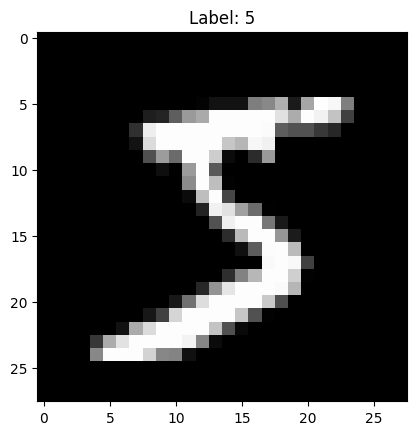

In [ ]:
# MNIST 데이터셋을 불러옵니다.
mnist = datasets.MNIST(root='./data', train=True, download=True)

image, label = mnist[0]

# 이미지를 출력합니다.
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
# transform 정의합니다.
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
# 커스텀 데이터셋 클래스를 정의합니다.
class CustomDataset(Dataset):
    def __init__(self, mnist, transform=None):
        self.mnist = mnist
        self.transform = transform

    def __getitem__(self, idx):
        image, label = self.mnist[idx]
        if self.transform:  # 만약 주어진 transform이 있다면
            image = self.transform(image)  # 이미지에 변환을 적용합니다.
        return image, label

    def __len__(self):
        return len(self.mnist)

# 커스텀 데이터셋 객체를 생성합니다.
custom_dataset = CustomDataset(mnist, transform=transform)

Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])

배치 중 임의의 이미지 출력 - 레이블 : 5


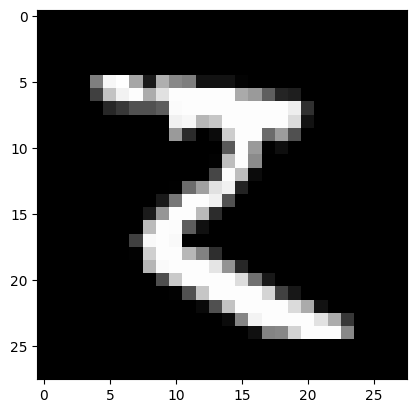

In [ ]:
# DataLoader를 이용해 데이터를 배치 단위로 불러올 수 있도록 합니다.
data_loader = DataLoader(custom_dataset, batch_size=64, shuffle=False)

# DataLoader를 통해 데이터를 불러옵니다.
for idx, (images, labels) in enumerate(data_loader):
    sample_img, sample_lb = images[0], labels[0]
    print(f'Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.

# 배치 중 하나의 이미지를 출력해봅니다.
print("\n배치 중 임의의 이미지 출력 - 레이블 :", sample_lb.item())
plt.imshow(sample_img.squeeze().numpy(), cmap='gray')  # 이미지는 텐서이므로 넘파이 배열로 변환합니다.
plt.show()

      
      ## 3 데이터 나누기

#### 1) 훈련용 CustomDataset, 검증용 CustomDataset 따로 만들기

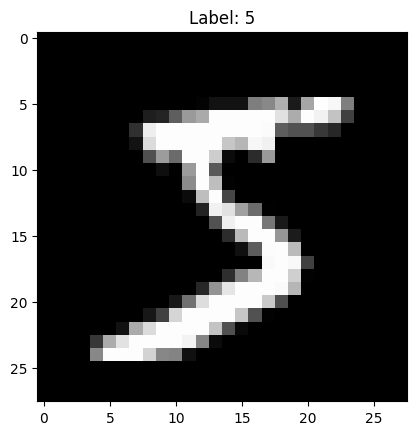

In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

# MNIST 데이터셋을 불러옵니다.
mnist = datasets.MNIST(root='./data', train=True, download=True)

image, label = mnist[0]

# 이미지를 출력합니다.
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
mnist_list = [mnist[i] for i in range(len(mnist))]
len(mnist_list)

60000

In [ ]:
# 훈련용 데이터 transform 정의합니다.
train_transform = transforms.Compose([
    transforms.RandomRotation(180),# 0~180도 사이로 무작위 회전
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
# 검증용 데이터 transform 정의합니다.
valid_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [ ]:
# 훈련용 커스텀 데이터셋 클래스를 정의합니다.
class TrainCustomDataset(Dataset):
    def __init__(self, data, transform=None):
        # 전체 데이터에서 80% 슬라이싱
        self.data = data[:int(0.8*len(data))]
        # 훈련용 transform
        self.transform = transform

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:  # 만약 주어진 transform이 있다면
            image = self.transform(image)  # 이미지에 변환을 적용합니다.
        return image, label

    def __len__(self):
        return len(self.data)

# 훈련용 커스텀 데이터셋 클래스를 정의합니다.
class ValidCustomDataset(Dataset):
    def __init__(self, data, transform=None):
        # 전체 데이터에서 나머지 20% 슬라이싱
        self.data = data[int(0.8*len(data)):]
        # 검증용 transform
        self.transform = transform

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:  # 만약 주어진 transform이 있다면
            image = self.transform(image)  # 이미지에 변환을 적용합니다.
        return image, label

    def __len__(self):
        return len(self.data)



# 커스텀 데이터셋 객체를 생성합니다.
train_dataset = TrainCustomDataset(mnist_list, transform=train_transform)
valid_dataset = ValidCustomDataset(mnist_list, transform=valid_transform)

[Training] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])
[Validation] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])


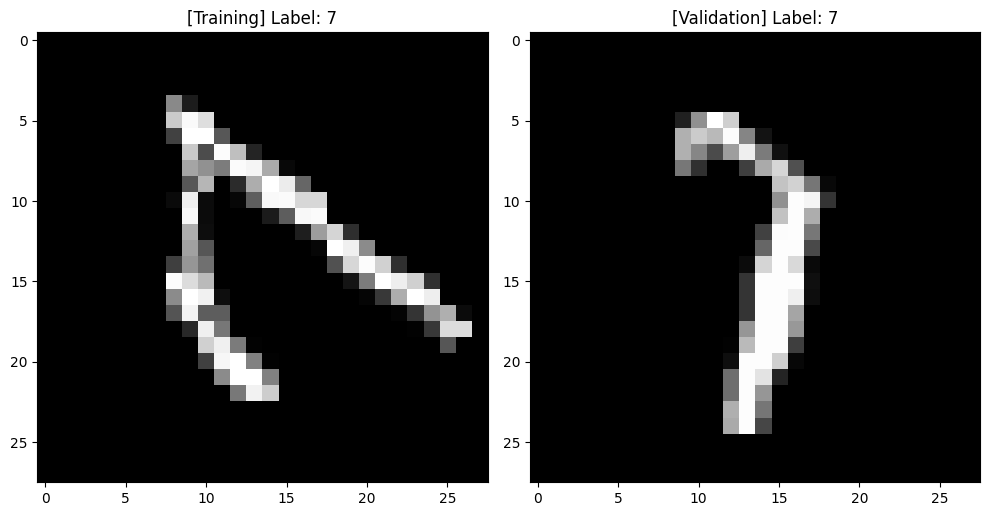

In [ ]:
# train_loader 생성 후 루프 돌리면서 데이터 불러오기
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(train_loader):
    train_sample_img, train_sample_lb = images[0], labels[0]
    print(f'[Training] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.

# valid_loader 생성 후 루프 돌리면서 데이터 불러오기
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(valid_loader):
    valid_sample_img, valid_sample_lb = images[0], labels[0]
    print(f'[Validation] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.


fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 subplot 생성

# 훈련용 이미지 출력
axes[0].imshow(train_sample_img.squeeze().numpy(), cmap='gray')
axes[0].set_title(f'[Training] Label: {train_sample_lb.item()}')

# 검증용 이미지 출력
axes[1].imshow(valid_sample_img.squeeze().numpy(), cmap='gray')
axes[1].set_title(f'[Validation] Label: {valid_sample_lb.item()}')

plt.tight_layout()
plt.show()

#### 2) 하나의 CustomDataset 안에서 나눠주기

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.8MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 349kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.76MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.24MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



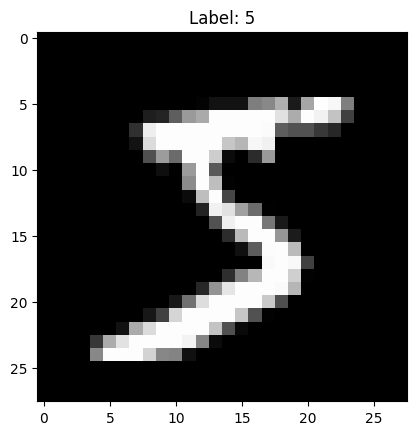

In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

# MNIST 데이터셋을 불러옵니다.
mnist = datasets.MNIST(root='./data', train=True, download=True)

image, label = mnist[0]

# 이미지를 출력합니다.
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

In [ ]:
mnist_list = [mnist[i] for i in range(len(mnist))]
len(mnist_list)

60000

In [ ]:
# 훈련용 데이터 transform 정의합니다.
transform = {"train" :
             transforms.Compose([
                 transforms.RandomRotation(180),# 0~180도 사이로 무작위 회전
                 transforms.ToTensor(),
                 transforms.Normalize((0.1307,), (0.3081,))
                 ]),
             "valid" :
             transforms.Compose([
                 transforms.ToTensor(),
                 transforms.Normalize((0.1307,), (0.3081,))
                 ])}

In [ ]:
# 커스텀 데이터셋 클래스를 생성합니다.
class CustomDataset(Dataset):
    def __init__(self, data, transform=None, phase='train'):
        if phase == 'train':
            self.data = data[:int(0.8*len(data))]
        else:  # phase == 'valid'
            self.data = data[int(0.8*len(data)):]
        self.transform = transform[phase]

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.data)


# 커스텀 데이터셋 객체를 생성합니다.
train_dataset = CustomDataset(mnist_list, transform=transform,
                              phase='train')
valid_dataset = CustomDataset(mnist_list, transform=transform,
                              phase='valid')

[Training] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])
[Validation] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])


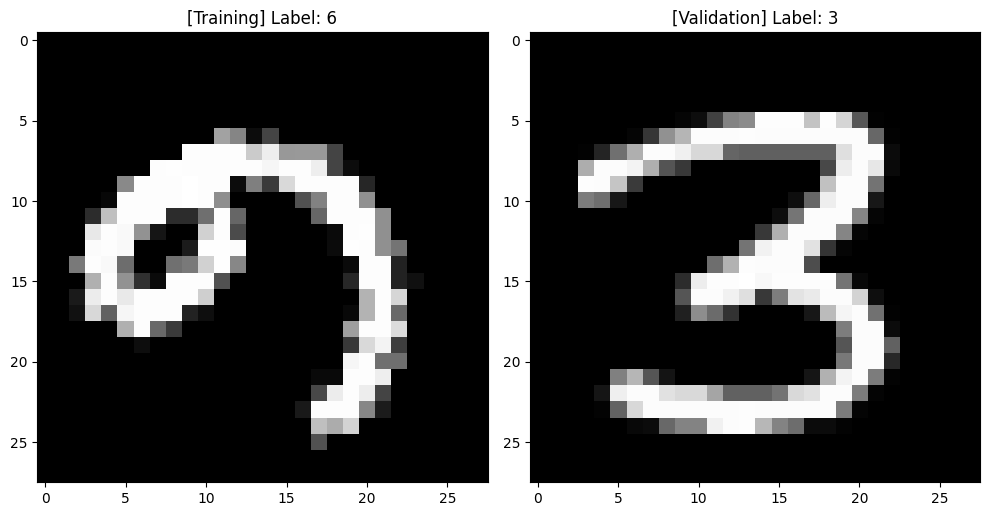

In [ ]:
# train_loader 생성 후 루프 돌리면서 데이터 불러오기
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(train_loader):
    train_sample_img, train_sample_lb = images[0], labels[0]
    print(f'[Training] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.

# valid_loader 생성 후 루프 돌리면서 데이터 불러오기
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(valid_loader):
    valid_sample_img, valid_sample_lb = images[0], labels[0]
    print(f'[Validation] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.


fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 subplot 생성

# 훈련용 이미지 출력
axes[0].imshow(train_sample_img.squeeze().numpy(), cmap='gray')
axes[0].set_title(f'[Training] Label: {train_sample_lb.item()}')

# 검증용 이미지 출력
axes[1].imshow(valid_sample_img.squeeze().numpy(), cmap='gray')
axes[1].set_title(f'[Validation] Label: {valid_sample_lb.item()}')

plt.tight_layout()
plt.show()

[Training] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])
[Validation] Batch 1
Images shape: torch.Size([64, 1, 28, 28]) , Labels shape: torch.Size([64])


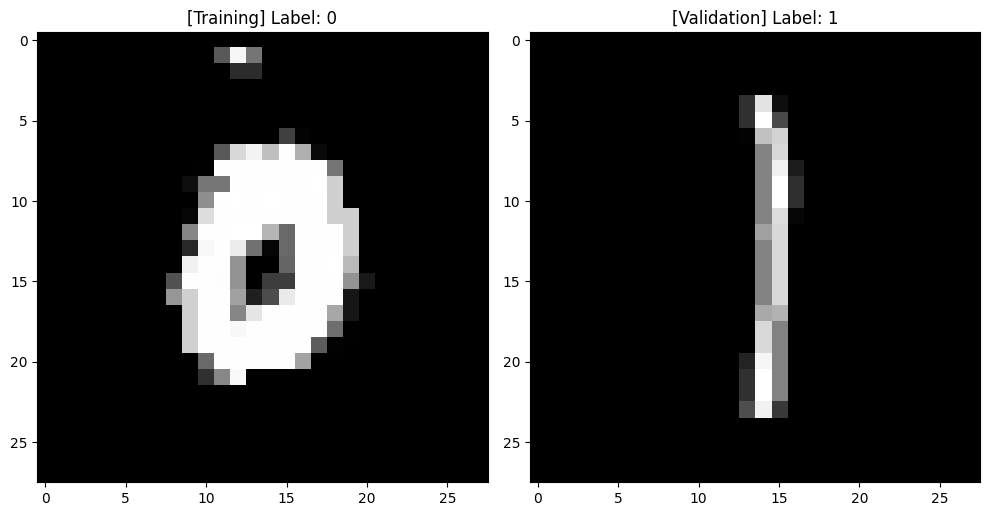

In [ ]:
# 데이터를 섞어서 랜덤으로 훈련용, 검증용을 나누는 방법입니다.

import random  # random 모듈 임포트

class CustomDataset(Dataset):
    def __init__(self, data, transform=None, phase='train'):
        random.shuffle(data)  # 데이터 셔플
        if phase == 'train':
            self.data = data[:int(0.8*len(data))]
        else:  # phase == 'valid'
            self.data = data[int(0.8*len(data)):]
        self.transform = transform[phase]

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

    def __len__(self):
        return len(self.data)

# 커스텀 데이터셋 객체를 생성합니다.
train_dataset = CustomDataset(mnist_list, transform=transform, phase='train')
valid_dataset = CustomDataset(mnist_list, transform=transform, phase='valid')

# train_loader 생성 후 루프 돌리면서 데이터 불러오기
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(train_loader):
    train_sample_img, train_sample_lb = images[0], labels[0]
    print(f'[Training] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.

# valid_loader 생성 후 루프 돌리면서 데이터 불러오기
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=True)
for idx, (images, labels) in enumerate(valid_loader):
    valid_sample_img, valid_sample_lb = images[0], labels[0]
    print(f'[Validation] Batch {idx+1}')
    print('Images shape:', images.shape, ', Labels shape:', labels.shape)
    break  # 예제이므로 한 배치만 출력하고 중단합니다.


fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1행 2열의 subplot 생성

# 훈련용 이미지 출력
axes[0].imshow(train_sample_img.squeeze().numpy(), cmap='gray')
axes[0].set_title(f'[Training] Label: {train_sample_lb.item()}')

# 검증용 이미지 출력
axes[1].imshow(valid_sample_img.squeeze().numpy(), cmap='gray')
axes[1].set_title(f'[Validation] Label: {valid_sample_lb.item()}')

plt.tight_layout()
plt.show()

#### PyTorch 정수형 및 실수형 데이터 타입 정리

#### 1. 정수형 (Integer)

| **데이터 타입**       | **PyTorch dtype**        | **비트 크기** | **설명**                                  |
|----------------------|--------------------------|--------------|------------------------------------------|
| **8비트 부호 없음**    | `torch.uint8`            | 8-bit        | 0 ~ 255 범위의 부호 없는 정수             |
| **8비트 부호 있음**    | `torch.int8`             | 8-bit        | -128 ~ 127 범위의 부호 있는 정수          |
| **16비트 부호 있음**   | `torch.int16` 또는 `torch.short` | 16-bit       | -32,768 ~ 32,767 범위의 부호 있는 정수    |
| **32비트 부호 있음**   | `torch.int32` 또는 `torch.int`   | 32-bit       | -2,147,483,648 ~ 2,147,483,647           |
| **64비트 부호 있음**   | `torch.int64` 또는 `torch.long`  | 64-bit       | 매우 큰 범위의 부호 있는 정수             |

---

#### 2. 실수형 (Floating Point)

| **데이터 타입**       | **PyTorch dtype**        | **비트 크기** | **설명**                                  |
|----------------------|--------------------------|--------------|------------------------------------------|
| **16비트 실수**       | `torch.float16` 또는 `torch.half` | 16-bit       | 반정밀도(float16), GPU 연산 최적화        |
| **32비트 실수**       | `torch.float32` 또는 `torch.float`| 32-bit       | 표준 단정밀도(float32), 기본 값           |
| **64비트 실수**       | `torch.float64` 또는 `torch.double`| 64-bit       | 배정밀도(float64), 높은 정밀도 연산        |

#### 직접해봅시다.
- dataset : MNIST

- transforms 선택
    - RandomCrop
    - RandomHorizontalFlip
    - ToTensor, long type (위 참고)
    - Normalize (위 참고)

- CustomDatasets class 하나로 train, val, test 처리
    - train : val : test = 6 : 2 : 2

- DataLoader : batch size = 32, shuffle ok

- DataLoader loop : print img shape, label shape

In [ ]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [ ]:
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

# 모델

### 1) 직접 모델 클래스 만들기

#### (1) 기본적인 형태

In [ ]:
# 필요한 모듈 불러오기
import torch
import torch.nn as nn

# nn.Module을 상속받는 MyModel 클래스를 정의
class MyModel(nn.Module):
    def __init__(self): # 실행 : 인스턴스 처음 선언 시 (클래스 호출 시)
        super(MyModel, self).__init__() # nn.Module의 초기화 메소드를 호출
        self.fc1 = nn.Linear(10, 1) # 레이어 정의 : WX = Linear(n_in, n_out)
        self.activation = nn.Sigmoid() # 활성화 함수 정의

    # 순전파 정의
    # def __call__() : 생성된 인스턴스가 호출될 때 실행되는 함수
    def forward(self, inputs): # 실행 : 인스턴스 호출 시
        x = self.fc1(inputs) # 입력 데이터 레이어 통과
        outputs = self.activation(x) # 입력 데이터 활성화 함수 통과
        return outputs # 결과값

### pytorch 모델 클래스 주요 매직 메서드 정리
- init : 클래스 호출 시 실행 (인스턴스 생성 시 실행)
- call : (인스턴스 생성 후) 인스턴스 호출 시 실행
- forward : (인스턴스 생성 후) 인스턴스 호출 시 실행

pytorch에서 모델 클래스 사용시, forward가 call을 대신한다. (내부적으로는 인스턴스 호출 : call 실행 --> forward 실행)

- 이렇게 forward 구조를 설계해둔 것은 사용자들의 편의를 위해서 기본적으로 필요한 기능들을 모두 내포시킨 것으로 이해하면 된다.
- call 함수를 직접 선언한다면, 그런 내포된 모든 기능들까지 본인이 직접 작성해야 한다.

#### 인스턴스(모델)을 호출했을 때 실행되는 forward 작성하기
- 모델 호출 ? == 모델 추론 실행
- 모델(데이터 입력) -> 결과값 추론  
예) model 선언 후, 1 입력했을 때 결과 추론하고 싶다면? model(1) 호출
- 즉, forward -> 모델 구조를 짜두고, 최종 출력값을 return해주면 된다.  

In [ ]:
model = MyModel() # 모델 인스턴스 생성 = init 실행
print(model) # 모델 구조 확인

MyModel(
  (fc1): Linear(in_features=10, out_features=1, bias=True)
  (activation): Sigmoid()
)


In [ ]:
# 샘플 데이터 생성
sample_data = torch.randn(1, 10)  # 배치 크기 1, 입력 차원 10인 임의의 데이터
print("sample data :", sample_data)

# 인스턴스 model 호출 (forward 함수 실행 )
# data input -> output 추론(infer)
output = model(sample_data)

print("output :", output)  # 모델의 출력 확인


sample data : tensor([[-0.5044,  1.9326,  2.5668, -0.6688,  0.6316, -0.6245, -1.8100, -0.5306,
         -0.0500,  1.0979]])
output : tensor([[0.6471]], grad_fn=<SigmoidBackward0>)


#### (2) Sequential 모듈 사용

In [ ]:

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # Sequntial을 이용해 block1 정의

        self.layer1 = nn.Sequential(
            nn.Linear(10, 10),  # 10차원 입력을 받아 10차원 출력
            nn.ReLU(),  # ReLU 활성화 함수
        )

        self.layer2 = nn.Sequential(
            nn.Linear(10, 5),  # 10차원 입력을 받아 10차원 출력
            nn.ReLU(),  # ReLU 활성화 함수
        )

        self.layer3 = nn.Sequential(
            nn.Linear(5, 1),
            nn.Sigmoid()
        )

    # 순전파 연산
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [ ]:
model = MyModel() # 모델 인스턴스 생성
print(model) # 모델 구조 확인

MyModel(
  (network1): Sequential(
    (0): Linear(in_features=10, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=10, bias=True)
    (3): ReLU()
  )
  (network2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
# 샘플 데이터 생성
sample_data = torch.randn(1, 10)  # 배치 크기 1, 입력 차원 10인 임의의 데이터
print("sample_data :", sample_data)
print("sample_data 사이즈 :", sample_data.size())
print("")
# 모델을 통과시키기
output = model(sample_data)

print("output :", output)  # 모델의 출력 확인


sample_data : tensor([[-1.0235, -2.3792, -0.7356,  1.0625, -0.1110,  0.5577,  0.1457, -2.9797,
          1.4509,  0.5018]])
sample_data 사이즈 : torch.Size([1, 10])

output : tensor([[0.4596]], grad_fn=<SigmoidBackward0>)


### 문제
아래 조건에 맞는 다층 퍼셉트론 클래스를 직접 선언하고, 임의의 데이터셋을 입력받아 추론해보자.
- 모델 조건 :
    - 층 : 5층
    - 입력 피처 수 : 784
    - 모든 은닉층 노드 수 : 256
    - 출력 : 이진 분류에 맞도록 구성
    - 은닉층 act : ReLU
    - 출력층 act : sigmoid
- 데이터 조건:  
    - 방식 : random (위 참고)  
    - 데이터 개수 : 5
    - 데이터 피처 수 : 784

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # Sequntial을 이용해 block1 정의

        self.layer1 = nn.Sequential(
            nn.Linear(784, 256),  # 10차원 입력을 받아 10차원 출력
            nn.ReLU(),  # ReLU 활성화 함수
        )

        self.layer2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
        )

        self.layer3 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
        )
        self.layer4 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
        )
        self.layer5 = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )


    # 순전파 연산
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x

In [ ]:
model = MyModel() # 모델 인스턴스 생성
print(model) # 모델 구조 확인

MyModel(
  (layer1): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Linear(in_features=256, out_features=256, bias=True)
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Linear(in_features=256, out_features=1, bias=True)
    (1): Sigmoid()
  )
)


In [ ]:
# 샘플 데이터 생성
sample_data = torch.randn(5, 784)  # 배치 크기 1, 입력 차원 10인 임의의 데이터
print("sample_data :", sample_data)
print("sample_data 사이즈 :", sample_data.size())
print("")
# 모델을 통과시키기
output = model(sample_data)

print("output :", output)  # 모델의 출력 확인


sample_data : tensor([[-0.1898, -0.1535, -0.1664,  ..., -0.7449,  0.0307, -0.4995],
        [-0.3509, -0.1013,  0.5704,  ...,  1.8370,  0.9494,  0.6202],
        [ 0.5760, -3.4248, -0.8694,  ..., -1.0517, -0.4818,  0.2720],
        [-1.0145,  0.7016,  0.0077,  ..., -0.3806,  1.0851,  0.1120],
        [ 0.5326,  0.1942,  1.8307,  ..., -0.9436, -0.2445, -0.0347]])
sample_data 사이즈 : torch.Size([5, 784])

output : tensor([[0.5131],
        [0.5142],
        [0.5162],
        [0.5119],
        [0.5124]], grad_fn=<SigmoidBackward0>)


##### 정답

In [ ]:
import torch
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # Sequntial을 이용해 block1 정의

        self.hidden_layer1 = nn.Sequential(
            nn.Linear(784, 256),  # 10차원 입력을 받아 10차원 출력
            nn.ReLU(),  # ReLU 활성화 함수
        )

        self.hidden_layer2 = nn.Sequential(
            nn.Linear(256, 256),  # 10차원 입력을 받아 10차원 출력
            nn.ReLU(),  # ReLU 활성화 함수
        )

        self.output_layer = nn.Sequential(
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    # 순전파 연산
    def forward(self, x):
        x = self.hidden_layer1(x)
        x = self.hidden_layer2(x)
        x = self.hidden_layer2(x)
        x = self.hidden_layer2(x)
        x = self.output_layer(x)
        return x

In [ ]:
model = MyModel() # 모델 인스턴스 생성

sample_data = torch.randn(5, 784)  # 배치 크기 5, 입력 차원 784인 임의의 데이터
output = model(sample_data)

print("output :", output)  # 모델의 출력 확인

output : tensor([[0.4835],
        [0.4799],
        [0.4832],
        [0.4845],
        [0.4846]], grad_fn=<SigmoidBackward0>)


### 2) 학습된 모델 불러오기

In [ ]:
# 필요한 라이브러리 불러오기

import torch
import torch.nn as nn

import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn.functional as F

In [ ]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [ ]:
# 사전 학습된 파라미터를 사용하여 ResNet 모델을 불러오기
resnet = models.resnet50(pretrained=True)

# 모델의 구조를 출력
print(resnet)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 182MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
resnet.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
resnet.fc.in_features

2048

In [ ]:
# 출력 레이어의 output 수정
resnet.fc = nn.Linear(resnet.fc.in_features, 10)
resnet.fc

Linear(in_features=2048, out_features=10, bias=True)

In [ ]:
# transform 정의
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # 1채널을 3채널로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 이미지 정규화
])

# MNIST 데이터셋을 다운로드하고 변환
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 데이터로더 생성
dataloader = torch.utils.data.DataLoader(mnist, batch_size=8, shuffle=True)

# 샘플 데이터를 가져오기
images, labels = next(iter(dataloader))
images.shape

torch.Size([8, 3, 28, 28])

In [ ]:
# ResNet 모델에 샘플 데이터를 통과
# 결과로는 각 클래스에 대한 로짓 값 출력
outputs = resnet(images)

# 로짓을 softmax에 통과시켜서 각 클래스에 대한 확률값으로 변환
outputs = F.softmax(outputs, dim=1)

print(outputs)
print(outputs.shape)

tensor([[0.1050, 0.0557, 0.1324, 0.1755, 0.0603, 0.1341, 0.0624, 0.0587, 0.0800,
         0.1360],
        [0.0964, 0.0773, 0.1217, 0.1065, 0.0619, 0.1161, 0.0553, 0.0713, 0.0870,
         0.2065],
        [0.0829, 0.1470, 0.2490, 0.0473, 0.0197, 0.1083, 0.0438, 0.0651, 0.0461,
         0.1909],
        [0.1273, 0.0985, 0.1145, 0.1011, 0.0731, 0.1369, 0.0853, 0.0564, 0.0811,
         0.1259],
        [0.1012, 0.0314, 0.0266, 0.0756, 0.1307, 0.0642, 0.0269, 0.0568, 0.0799,
         0.4066],
        [0.1100, 0.1647, 0.1006, 0.0943, 0.0577, 0.1104, 0.0938, 0.0639, 0.1162,
         0.0883],
        [0.0877, 0.0785, 0.1395, 0.1484, 0.0636, 0.1370, 0.0697, 0.0674, 0.0709,
         0.1373],
        [0.0758, 0.1666, 0.1193, 0.1561, 0.0699, 0.1085, 0.0822, 0.0665, 0.0789,
         0.0763]], grad_fn=<SoftmaxBackward0>)
torch.Size([8, 10])


In [ ]:
sum([0.1050, 0.0557, 0.1324, 0.1755, 0.0603, 0.1341, 0.0624, 0.0587, 0.0800,
         0.1360])

1.0001